In [7]:
import pandas as pd
import numpy as npd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Data transaksi pembelian barang
data = [
    ["Margarin", "Obat", "Nanas", "Kacang", "Ebi", "Yoghurt"],
    ["Duku", "Obat", "Nanas", "Kacang", "Ebi", "Yoghurt"],
    ["Margarin", "Apel", "Kacang", "Ebi"],
    ["Margarin", "Ubi", "Cempedak", "Kacang", "Yoghurt"],
    ["Cokelat", "Obat", "Obat", "Kacang", "Ikan", "Ebi"]
]
df=pd.DataFrame(data)

# Menggunakan TransactionEncoder untuk mengonversi data ke format yang dapat diproses oleh algoritma Apriori
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Menggunakan algoritma Apriori untuk mengidentifikasi frequent itemset
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Menggunakan association_rules untuk menghasilkan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Menampilkan hasil
print("Frequent Itemsets:")
print(frequent_itemsets)
D
print("\nAturan Asosiasi:")
print(rules)


Frequent Itemsets:
    support             itemsets
0       0.8                (Ebi)
1       1.0             (Kacang)
2       0.6           (Margarin)
3       0.6               (Obat)
4       0.6            (Yoghurt)
5       0.8        (Kacang, Ebi)
6       0.6          (Obat, Ebi)
7       0.6   (Kacang, Margarin)
8       0.6       (Obat, Kacang)
9       0.6    (Yoghurt, Kacang)
10      0.6  (Kacang, Obat, Ebi)

Aturan Asosiasi:
       antecedents     consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric
0         (Kacang)           (Ebi)                 1.0                 0.8      0.8        0.80  1.00      0.00         1.0            0.0
1            (Ebi)        (Kacang)                 0.8                 1.0      0.8        1.00  1.00      0.00         inf            0.0
2           (Obat)           (Ebi)                 0.6                 0.8      0.6        1.00  1.25      0.12         inf            0.5
3          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


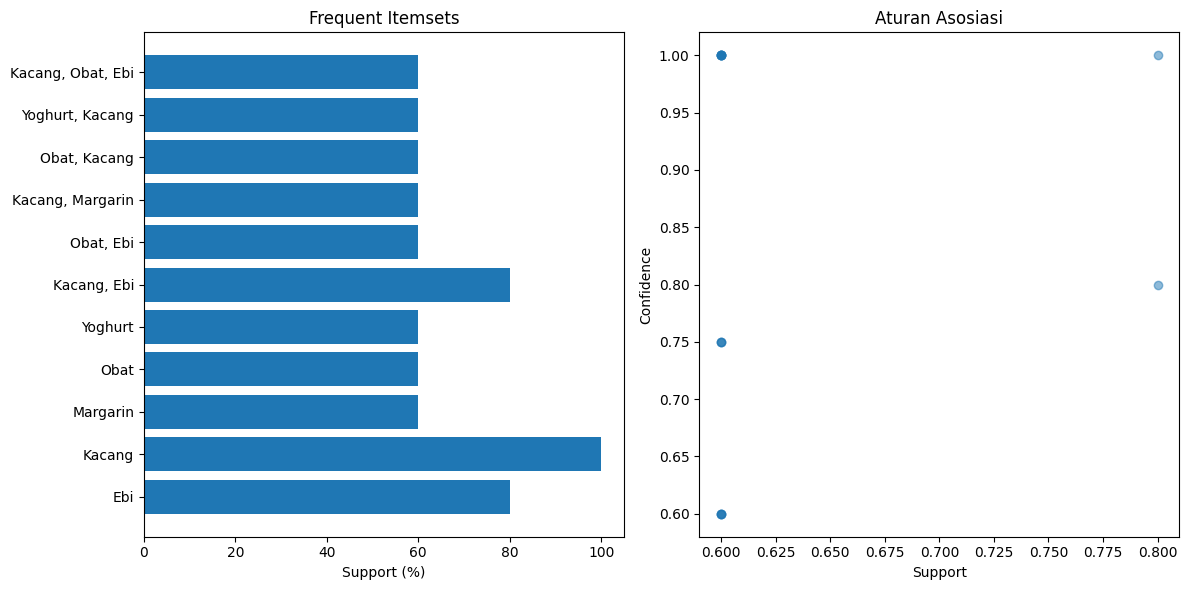

In [10]:
# Visualisasi Frequent Itemsets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)), frequent_itemsets['support']*100)
plt.xlabel('Support (%)')
plt.title('Frequent Itemsets')

# Visualisasi Aturan Asosiasi
plt.subplot(1, 2, 2)
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Aturan Asosiasi')

plt.tight_layout()
plt.show()